In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
data_dir = Path("new_split_1k/")
models_path = Path('best_model/')
check_dir(models_path)

In [2]:
image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

data_transform = create_transform(resize=resize, rotate=10, flip_h = True, color_dev=True, transf_tensor=True, normalize=True, sp_noise=True, gauss_noise=True)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
NUM_EPOCHS = 100
lr = 0.001
device = get_device()
effnetb0 = EfficientNetB0()
loss_fn = nn.CrossEntropyLoss()

In [4]:
model_name = "EfficientNetB0"
model_folder_path = models_path / model_name
check_dir(model_folder_path)
model_name_folder_path = model_folder_path / model_name

#Train EfficientNet B0
effnetb0.to(device)
nadam_optim = torch.optim.NAdam(params=effnetb0.parameters(), lr=lr)
train_effnetb0_results, train_time_effnetb0 = train(effnetb0, train_dl, validation_dl, optimizer=nadam_optim, loss_fn=loss_fn, epochs=NUM_EPOCHS, name_save=model_name_folder_path, device=device)

best_model\EfficientNetB0 does not exist, creating one...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.2190 | train_acc: 0.4377 | validation_loss: 0.8063 | validation_acc: 0.7266
Epoch: 2 | train_loss: 0.5215 | train_acc: 0.7678 | validation_loss: 0.3602 | validation_acc: 0.7949
Epoch: 3 | train_loss: 0.2887 | train_acc: 0.8768 | validation_loss: 0.4061 | validation_acc: 0.8320
Epoch: 4 | train_loss: 0.2155 | train_acc: 0.9115 | validation_loss: 0.5150 | validation_acc: 0.7852
Epoch: 5 | train_loss: 0.1567 | train_acc: 0.9390 | validation_loss: 0.5681 | validation_acc: 0.7617
Epoch: 6 | train_loss: 0.1391 | train_acc: 0.9490 | validation_loss: 0.6546 | validation_acc: 0.7598
Epoch: 7 | train_loss: 0.1014 | train_acc: 0.9617 | validation_loss: 0.4340 | validation_acc: 0.8516
Epoch: 8 | train_loss: 0.0782 | train_acc: 0.9710 | validation_loss: 0.5767 | validation_acc: 0.7871
Epoch: 9 | train_loss: 0.0702 | train_acc: 0.9750 | validation_loss: 0.5924 | validation_acc: 0.8555
Epoch: 10 | train_loss: 0.0615 | train_acc: 0.9775 | validation_loss: 0.4246 | validation_a

In [5]:
eval_effnetb0_results = eval_model(effnetb0, test_dl, loss_fn = loss_fn, accuracy_fn=accuracy_fn, device = device, dummy_input= torch.rand(32,3,224,224).to(device))
effnetb0_results = [train_effnetb0_results, train_time_effnetb0, eval_effnetb0_results]
final_save(model_folder_path, model_name, NUM_EPOCHS, effnetb0, effnetb0_results)

  0%|          | 0/32 [00:02<?, ?it/s]

In [4]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 87, device)
print("Done")

Done


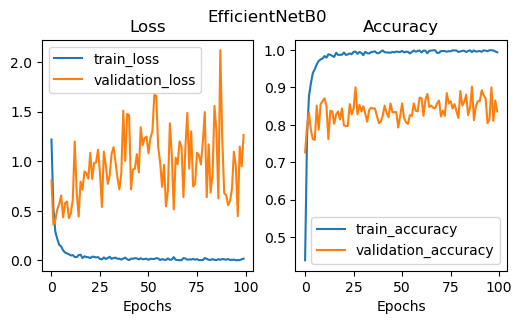

In [5]:
plot_loss_curves(effnetb0_results[0],"EfficientNetB0")

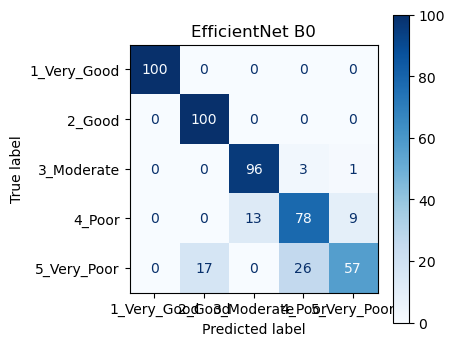

In [7]:
final_effnetb0_model.to(device)
plot_confusion_matrix(final_effnetb0_model,test_dl,device,class_names, "EfficientNet B0")

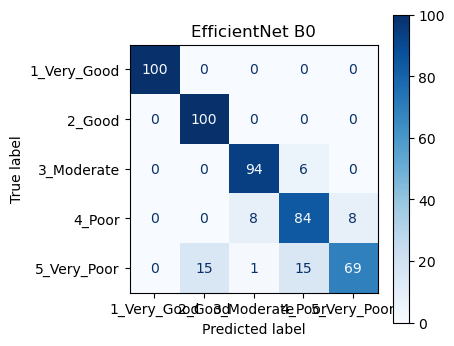

In [8]:
best_effnetb0_model.to(device)
plot_confusion_matrix(best_effnetb0_model,test_dl,device,class_names, "EfficientNet B0")